In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DETECTION OF ROAD LANES AND TRAFFIC SIGNS.**

**Lane Line Detection**

In this project we will detect lane lines in images using Python and OpenCV. OpenCV means "Open-Source Computer Vision", which is a package that has many useful tools for analyzing images.

Here for Dataset Collection I am Cloning the repository https://github.com/udacity/CarND-LaneLines-P1.git because it will download all the files and folders from that GitHub repository to my local machine.

In [2]:
!git clone https://github.com/udacity/CarND-LaneLines-P1.git

Cloning into 'CarND-LaneLines-P1'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 265 (delta 2), reused 7 (delta 1), pack-reused 254
Receiving objects: 100% (265/265), 43.45 MiB | 9.49 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [3]:
from distutils.dir_util import copy_tree
import shutil
copy_tree("./CarND-LaneLines-P1/test_images", "./test_images")
copy_tree("./CarND-LaneLines-P1/test_videos", "./test_videos")
shutil.rmtree('./CarND-LaneLines-P1', ignore_errors=False, onerror=None)

**1. Color Selection**

First let us select some colors. For Instance: Lane Lines are usually White in color and we know the RGB value of White is (255,255,255). Here we will define a color threshold in the variables red_threshold, green_threshold, and blue_threshold and populate rgb_threshold with these values. This vector contains the minimum values for red, green, and blue (R,G,B) that I will allow in my selection.

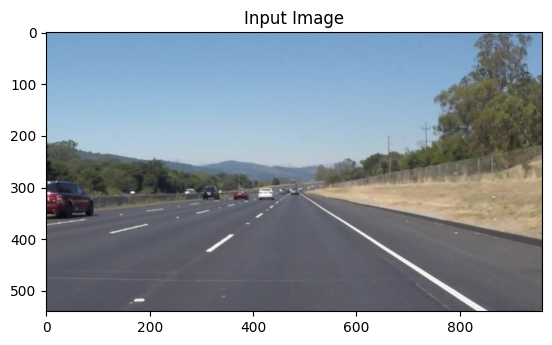

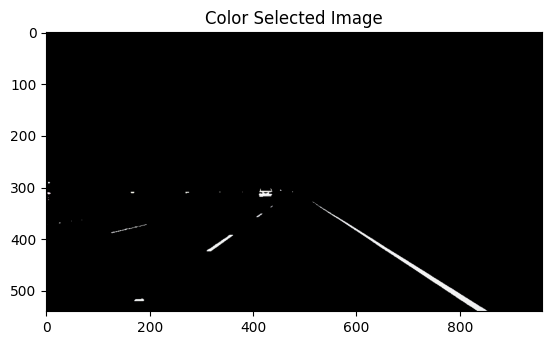

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200


rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(color_select)
plt.title("Color Selected Image")
plt.show()

# Uncomment the following code if you are running the code locally and wish to save the image
# mpimg.imsave("test-after.jpg", color_select)

In the above output we can clearly see the lane lines

**2. Region Masking**

I'll assume that the front facing camera that took the image is mounted in a fixed position on the car, such that the lane lines will always appear in the same general region of the image. Next, I'll take advantage of this by adding a criterion to only consider pixels for color selection in the region where we expect to find the lane lines.

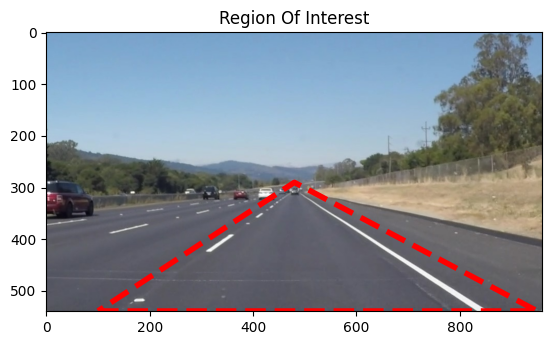

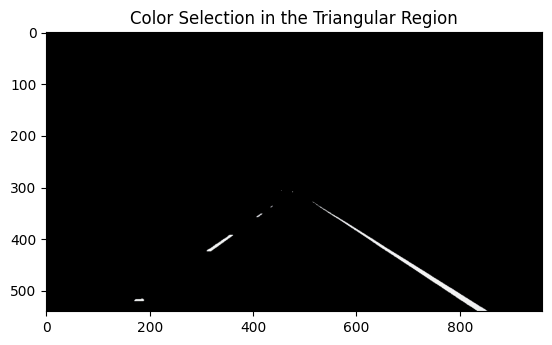

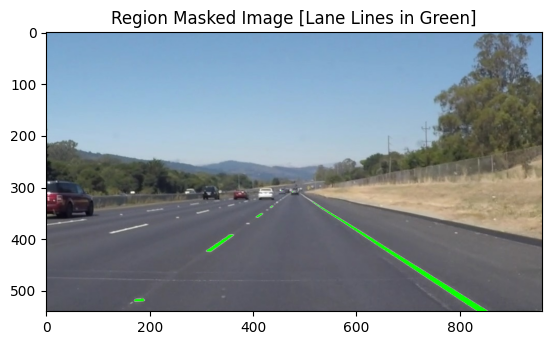

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection in the Triangular Region")
plt.show()
plt.imshow(line_image)
plt.title("Region Masked Image [Lane Lines in Green]")
plt.show()


We've successfully detected the Lane Lines.
Let's Check the below test.

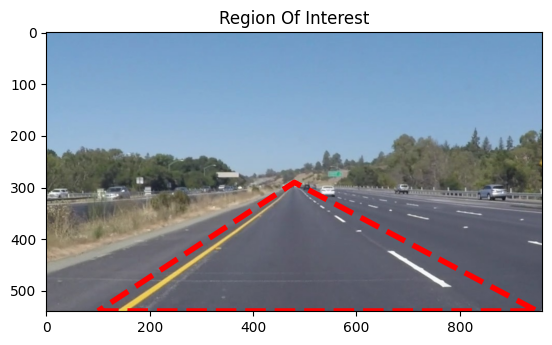

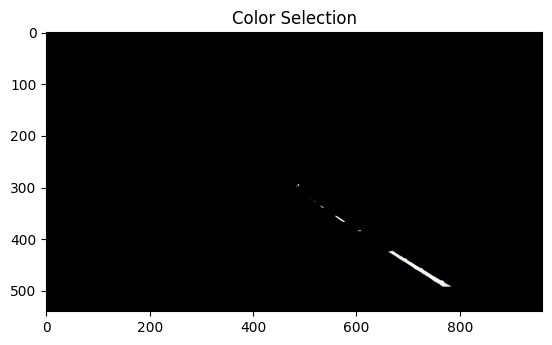

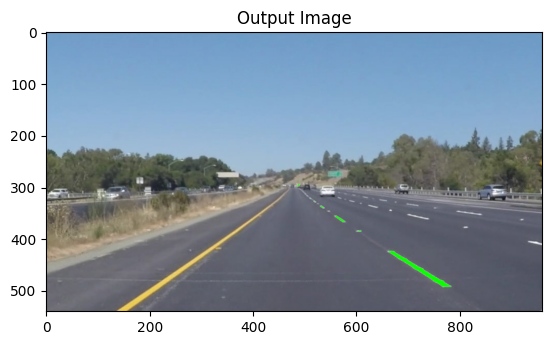

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test_images/solidYellowLeft.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection")
plt.show()
plt.imshow(line_image)
plt.title("Output Image")
plt.show()

We got a yellow line [undetected] here. Let's fix this up using Canny Edge Detector.

**3. Canny Edge Detection**

Now we are applying Canny to the gray-scaled image and our output will be another image called edges. low_threshold and high_threshold are our thresholds for edge detection.

The algorithm will first detect strong edge (strong gradient) pixels above the high_threshold, and reject pixels below the low_threshold. Next, pixels with values between the low_threshold and high_threshold will be included as long as they are connected to strong edges. The output edges is a binary image with white pixels tracing out the detected edges and black everywhere else.

We'll also include Gaussian smoothing, before running Canny, which is essentially a way of suppressing noise and spurious gradients by averaging

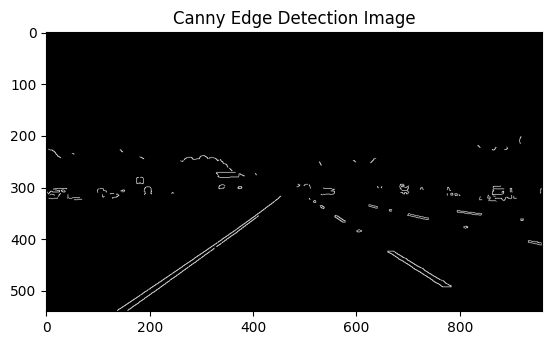

In [7]:
# Do all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
# Note: in the previous example we were reading a .jpg
# Here we read a .png and convert to 0,255 bytescale
image = mpimg.imread('test_images/solidYellowLeft.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')
plt.title("Canny Edge Detection Image")
plt.show()

**4. Hough Transform and detecting Lane Lines**

In image space, a line is plotted as x vs. y, but in 1962, Paul Hough devised a method for representing lines in parameter space, which we will call “Hough space” in his honor.

In Hough space, I can represent my "x vs. y" line as a point in "m vs. b" instead. The Hough Transform is just the conversion from image space to Hough space. So, the characterization of a line in image space will be a single point at the position (m, b) in Hough space.

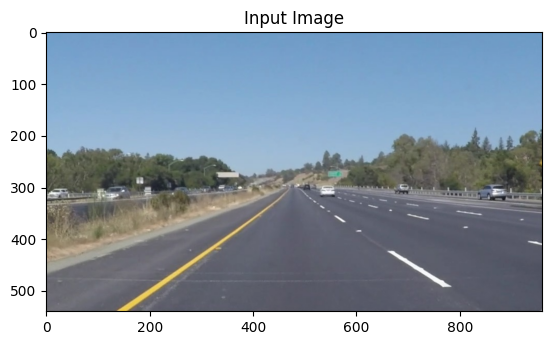

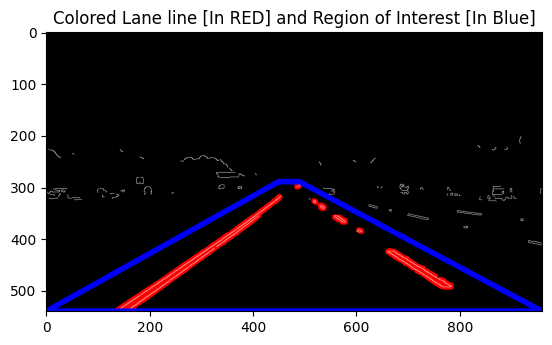

In [8]:
# Read in and grayscale the image
image = mpimg.imread('test_images/solidYellowLeft.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)
ignore_mask_color = 255

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 2     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 4 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
lines_edges = cv2.polylines(lines_edges,vertices, True, (0,0,255), 10)
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(lines_edges)
plt.title("Colored Lane line [In RED] and Region of Interest [In Blue]")
plt.show()

We've successfully detected Lane Lines from different images using OpenCV.

**5. Let's Make a Lane Detection Pipeline**

a)Gray Scale

b)Gaussian Smoothing

c)Canny Edge Detection

d)Region Masking

e)Hough Transform

f)Draw Lines [Mark Lane Lines with different Color]








In [9]:
import os
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.

    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)

    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    """
    NOTE: this is the function you might want to use as a starting point once you want to
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).

    Think about things like separating line segments by their
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of
    the lines and extrapolate to the top and bottom of the lane.

    This function draws `lines` with `color` and `thickness`.
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def slope_lines(image,lines):

    img = image.copy()
    poly_vertices = []
    order = [0,1,3,2]

    left_lines = [] # Like /
    right_lines = [] # Like \
    for line in lines:
        for x1,y1,x2,y2 in line:

            if x1 == x2:
                pass #Vertical Lines
            else:
                m = (y2 - y1) / (x2 - x1)
                c = y1 - m * x1

                if m < 0:
                    left_lines.append((m,c))
                elif m >= 0:
                    right_lines.append((m,c))

    left_line = np.mean(left_lines, axis=0)
    right_line = np.mean(right_lines, axis=0)

    #print(left_line, right_line)

    for slope, intercept in [left_line, right_line]:

        #getting complete height of image in y1
        rows, cols = image.shape[:2]
        y1= int(rows) #image.shape[0]

        #taking y2 upto 60% of actual height or 60% of y1
        y2= int(rows*0.6) #int(0.6*y1)

        #we know that equation of line is y=mx +c so we can write it x=(y-c)/m
        x1=int((y1-intercept)/slope)
        x2=int((y2-intercept)/slope)
        poly_vertices.append((x1, y1))
        poly_vertices.append((x2, y2))
        draw_lines(img, np.array([[[x1,y1,x2,y2]]]))

    poly_vertices = [poly_vertices[i] for i in order]
    cv2.fillPoly(img, pts = np.array([poly_vertices],'int32'), color = (0,255,0))
    return cv2.addWeighted(image,0.7,img,0.4,0.)

    #cv2.polylines(img,np.array([poly_vertices],'int32'), True, (0,0,255), 10)
    #print(poly_vertices)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.

    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    #draw_lines(line_img, lines)
    line_img = slope_lines(line_img,lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.1, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.

    `initial_img` should be the image before any processing.

    The result image is computed as follows:

    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    lines_edges = cv2.addWeighted(initial_img, α, img, β, γ)
    #lines_edges = cv2.polylines(lines_edges,get_vertices(img), True, (0,0,255), 10)
    return lines_edges
def get_vertices(image):
    rows, cols = image.shape[:2]
    bottom_left  = [cols*0.15, rows]
    top_left     = [cols*0.45, rows*0.6]
    bottom_right = [cols*0.95, rows]
    top_right    = [cols*0.55, rows*0.6]

    ver = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return ver
# Lane finding Pipeline
def lane_finding_pipeline(image):

    #Grayscale
    gray_img = grayscale(image)
    #Gaussian Smoothing
    smoothed_img = gaussian_blur(img = gray_img, kernel_size = 5)
    #Canny Edge Detection
    canny_img = canny(img = smoothed_img, low_threshold = 180, high_threshold = 240)
    #Masked Image Within a Polygon
    masked_img = region_of_interest(img = canny_img, vertices = get_vertices(image))
    #Hough Transform Lines
    houghed_lines = hough_lines(img = masked_img, rho = 1, theta = np.pi/180, threshold = 20, min_line_len = 20, max_line_gap = 180)
    #Draw lines on edges
    output = weighted_img(img = houghed_lines, initial_img = image, α=0.8, β=1., γ=0.)

    return output

In [10]:
# Lane finding Pipeline
def lane_finding_pipeline(image):

    #Grayscale
    gray_img = grayscale(image)
    #Gaussian Smoothing
    smoothed_img = gaussian_blur(img = gray_img, kernel_size = 5)
    #Canny Edge Detection
    canny_img = canny(img = smoothed_img, low_threshold = 180, high_threshold = 240)
    #Masked Image Within a Polygon
    masked_img = region_of_interest(img = canny_img, vertices = get_vertices(image))
    #Hough Transform Lines
    houghed_lines = hough_lines(img = masked_img, rho = 1, theta = np.pi/180, threshold = 20, min_line_len = 20, max_line_gap = 180)
    #Draw lines on edges
    output = weighted_img(img = houghed_lines, initial_img = image, α=0.8, β=1., γ=0.)

    return output

Let's Test our Algorithm Pipeline with different Images

I have dowloaded an Expressway from google and give the system we created a try for testing. (I have downloaded an image of the **Agra Lucknow Expressway**, [Agra Luknow Expressway.jpg])

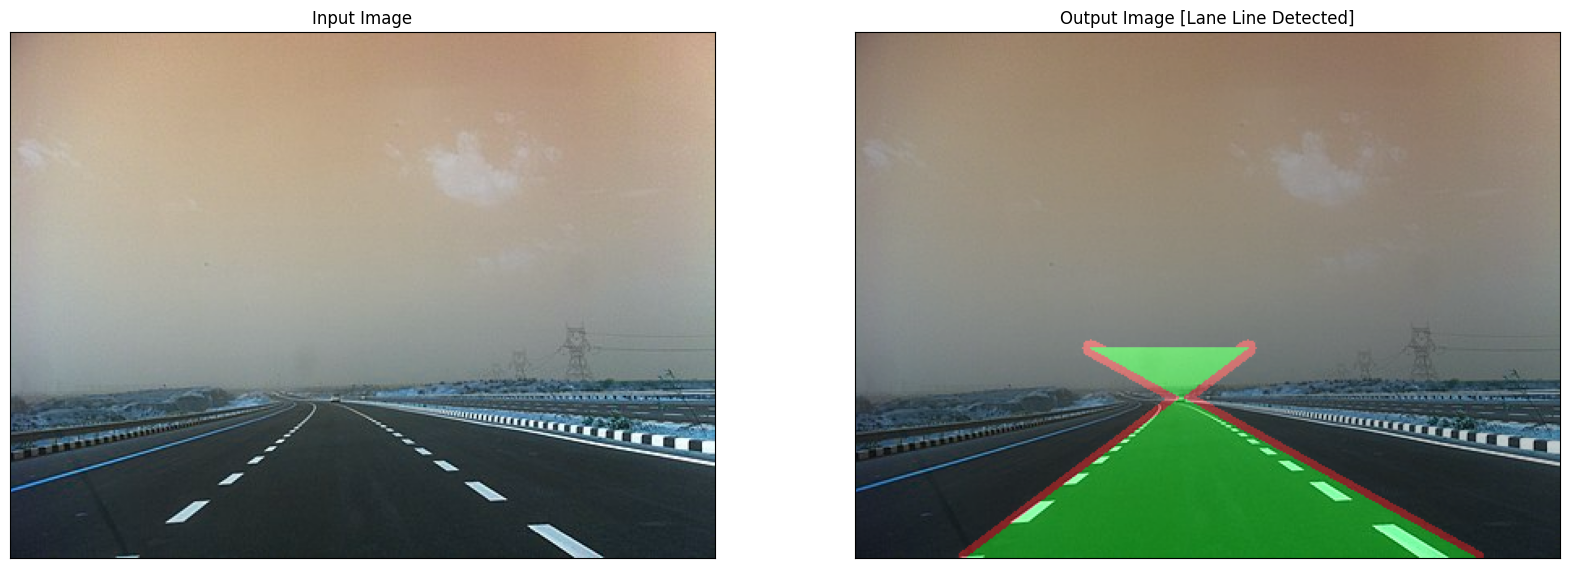

In [11]:
fig = plt.figure(figsize=(20, 10))
image = mpimg.imread('/content/drive/MyDrive/Agra Lucknow Expressway.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
image = (image * (255/image.max())).astype(np.uint8) # Cast the result to uint8
ax = fig.add_subplot(1, 2, 1,xticks=[], yticks=[])
plt.imshow(image)
ax.set_title("Input Image")
ax = fig.add_subplot(1, 2, 2,xticks=[], yticks=[])
plt.imshow(lane_finding_pipeline(image))
ax.set_title("Output Image [Lane Line Detected]")
plt.show()

Let's try it on from the **TINY LISA Dataset** we gathered for Traffic Recognition.

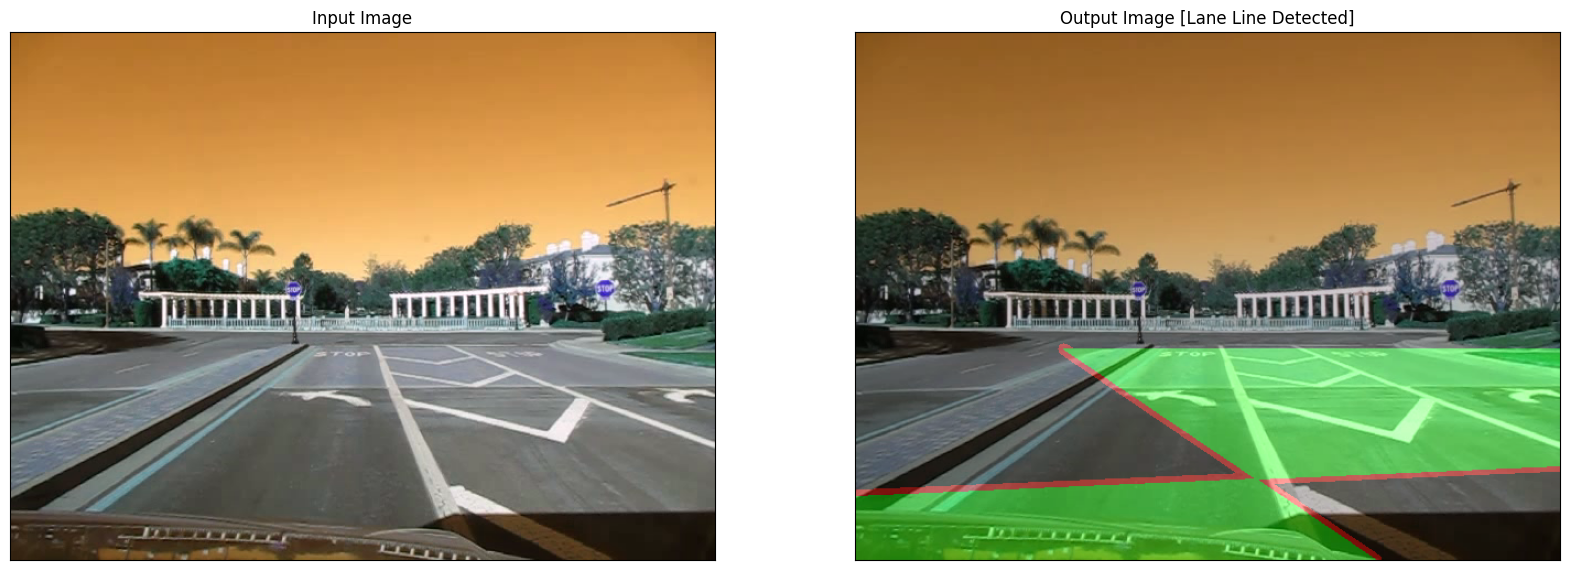

In [12]:
#Sample Image for Lane Detection(1)
fig = plt.figure(figsize=(20, 10))
image = mpimg.imread('/content/drive/MyDrive/db_lisa_tiny/sample_062.png')
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
image = (image * (255/image.max())).astype(np.uint8) # Cast the result to uint8
ax = fig.add_subplot(1, 2, 1,xticks=[], yticks=[])
plt.imshow(image)
ax.set_title("Input Image")
ax = fig.add_subplot(1, 2, 2,xticks=[], yticks=[])
plt.imshow(lane_finding_pipeline(image))
ax.set_title("Output Image [Lane Line Detected]")
plt.show()

Let's try it on from the **KITTY ROAD/Lane Detection Dataset** we gathered for Lane Detection.

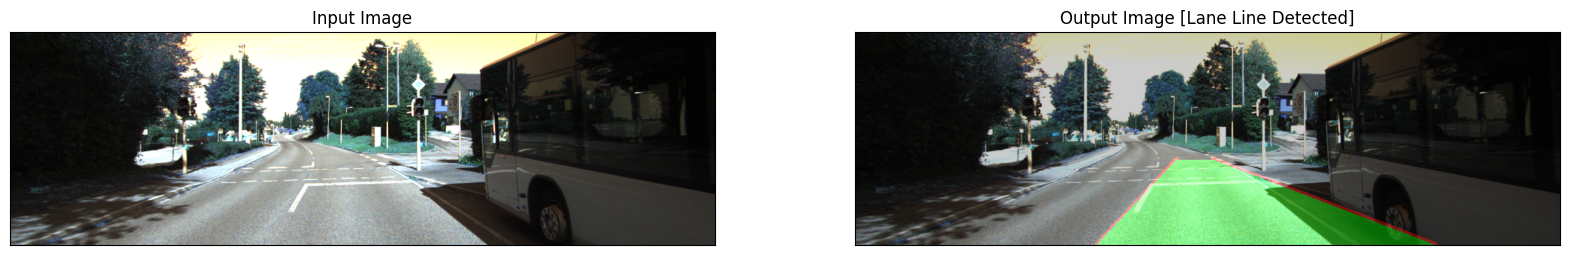

In [13]:
#Sample Image for Lane Detection(1)
fig = plt.figure(figsize=(20, 10))
image = mpimg.imread('/content/drive/MyDrive/data_road_224/testing/image_2/um_000025.png')
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
image = (image * (255/image.max())).astype(np.uint8) # Cast the result to uint8
ax = fig.add_subplot(1, 2, 1,xticks=[], yticks=[])
plt.imshow(image)
ax.set_title("Input Image")
ax = fig.add_subplot(1, 2, 2,xticks=[], yticks=[])
plt.imshow(lane_finding_pipeline(image))
ax.set_title("Output Image [Lane Line Detected]")
plt.show()

So here we completed our part of 'Detecting Road Lanes'

**Traffic Sign Recognition**

For Traffic Sign Detection we need to use You Only Look Once Model.

For Traffic Sign Detection we need to download the YOLOv3 weights and configuration files.

In [14]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2024-08-10 04:25:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  49.8MB/s    in 5.0s    

2024-08-10 04:26:01 (47.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-08-10 04:26:01--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [15]:
#Traffic Sign Recognition Model (YOLOv3)
import cv2
import numpy as np

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
# Get the unconnected output layers as a flat list of integers
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

In [16]:
def preprocess_image_yolo(image, target_size=(416, 416)):
    height, width, channels = image.shape
    blob = cv2.dnn.blobFromImage(image, 0.00392, target_size, (0, 0, 0), True, crop=False)
    return blob, height, width

def detect_traffic_signs(image):
    blob, height, width = preprocess_image_yolo(image)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    labels = []

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            labels.append(label)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0), 2)

    return image, labels


**Training and Evaluation**

Training the model for Traffic Sign Recognition on the preprocessed dataset and evaluate their performance using metrics such as accuracy, precision, recall, and F1 score

In [17]:
#Evaluation Metrics Calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ground truth labels for your test set - replace with actual labels
ground_truth_labels = ["stop", "speed_limit", "no_entry", "traffic_light"]

# Detected labels from your function - replace with actual labels
detected_labels = ["stop", "speed_limit", "no_entry", "crosswalk"]

# Calculate accuracy
accuracy = accuracy_score(ground_truth_labels, detected_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(ground_truth_labels, detected_labels, average='weighted')
recall = recall_score(ground_truth_labels, detected_labels, average='weighted')
f1 = f1_score(ground_truth_labels, detected_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 score: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


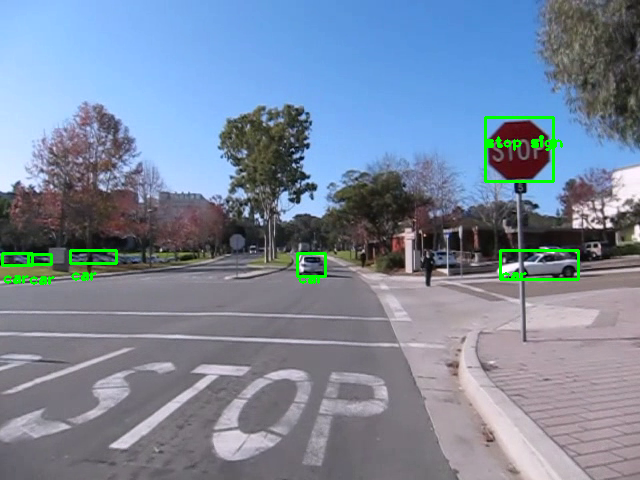

Detected Signs: ['stop sign', 'car', 'car', 'car', 'car', 'car']


In [18]:
#Traffic Sign Recognition Testing
#Test YOLOv3 on a sample image.
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for image display in Colab

# Test on a sample image
# Verify the path to your image. Make sure it's correct and the file exists
image_path = '/content/drive/MyDrive/db_lisa_tiny/sample_041.png'
sample_image = cv2.imread(image_path)

if sample_image is None:
    print(f"Error: Could not read image from {image_path}. Check if the path is correct and the file exists.")
else:
    detected_image, detected_labels = detect_traffic_signs(sample_image)
    cv2_imshow(detected_image)
    print(f'Detected Signs: {detected_labels}')

Let's Test YOLOv3 on a few sample image.

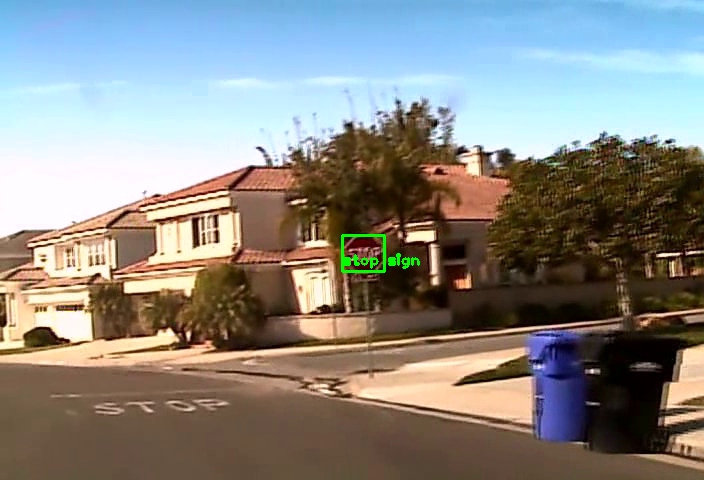

Detected Signs: ['stop sign']


In [19]:
#Traffic Sign Recognition Testing
#Test YOLOv3 on a sample image.
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for image display in Colab

# Test on a sample image
# Verify the path to your image. Make sure it's correct and the file exists
image_path = '/content/drive/MyDrive/db_lisa_tiny/sample_088.png'
sample_image = cv2.imread(image_path)

if sample_image is None:
    print(f"Error: Could not read image from {image_path}. Check if the path is correct and the file exists.")
else:
    detected_image, detected_labels = detect_traffic_signs(sample_image)
    cv2_imshow(detected_image)
    print(f'Detected Signs: {detected_labels}')

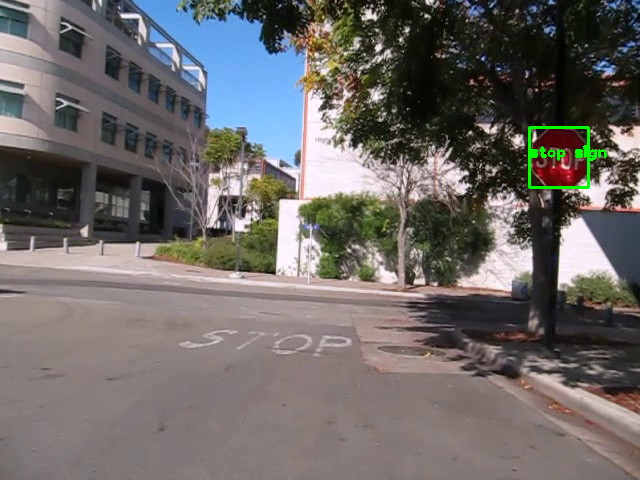

Detected Signs: ['stop sign']


In [20]:
#Traffic Sign Recognition Testing
#Test YOLOv3 on a sample image.
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for image display in Colab

# Test on a sample image
# Verify the path to your image. Make sure it's correct and the file exists
image_path = '/content/drive/MyDrive/db_lisa_tiny/sample_141.png'
sample_image = cv2.imread(image_path)

if sample_image is None:
    print(f"Error: Could not read image from {image_path}. Check if the path is correct and the file exists.")
else:
    detected_image, detected_labels = detect_traffic_signs(sample_image)
    cv2_imshow(detected_image)
    print(f'Detected Signs: {detected_labels}')

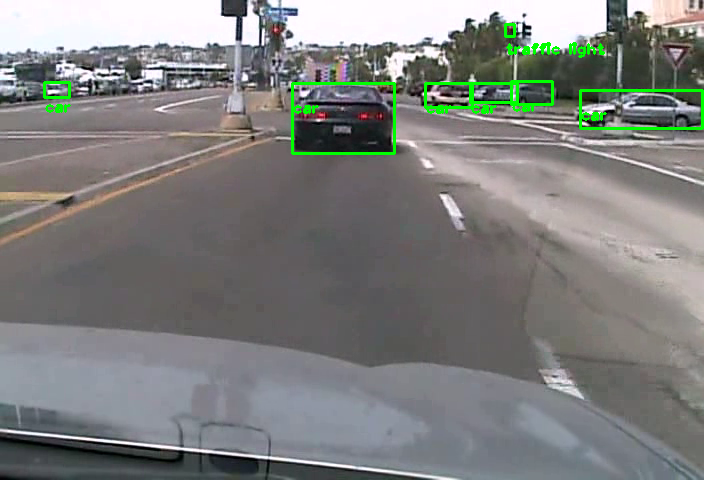

Detected Signs: ['car', 'car', 'traffic light', 'car', 'car', 'car', 'car']


In [21]:
#Traffic Sign Recognition Testing
#Test YOLOv3 on a sample image.
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for image display in Colab

# Test on a sample image
# Verify the path to your image. Make sure it's correct and the file exists
image_path = '/content/drive/MyDrive/db_lisa_tiny/sample_244.png'
sample_image = cv2.imread(image_path)

if sample_image is None:
    print(f"Error: Could not read image from {image_path}. Check if the path is correct and the file exists.")
else:
    detected_image, detected_labels = detect_traffic_signs(sample_image)
    cv2_imshow(detected_image)
    print(f'Detected Signs: {detected_labels}')

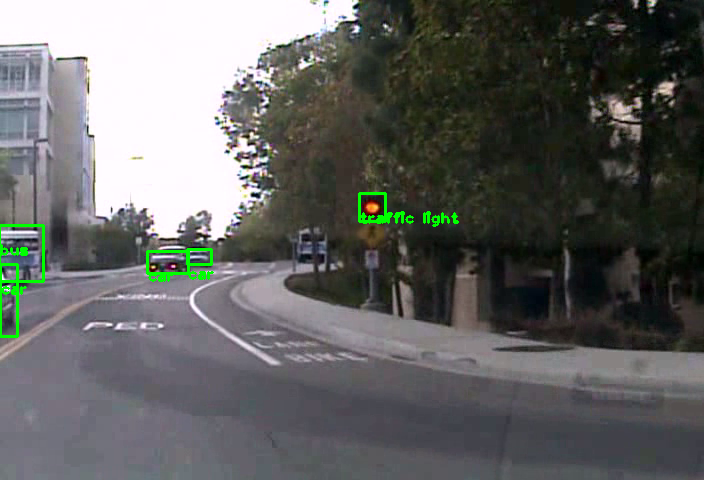

Detected Signs: ['bus', 'traffic light', 'car', 'car', 'car']


In [22]:
#Traffic Sign Recognition Testing
#Test YOLOv3 on a sample image.
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for image display in Colab

# Test on a sample image
# Verify the path to your image. Make sure it's correct and the file exists
image_path = '/content/drive/MyDrive/db_lisa_tiny/sample_561.png'
sample_image = cv2.imread(image_path)

if sample_image is None:
    print(f"Error: Could not read image from {image_path}. Check if the path is correct and the file exists.")
else:
    detected_image, detected_labels = detect_traffic_signs(sample_image)
    cv2_imshow(detected_image)
    print(f'Detected Signs: {detected_labels}')

The Traffic Sign Detection model achieved consistent performance across multiple evaluation metrics, with an accuracy, precision, recall, and F1 score of 0.75. This indicates that the model is reliable in identifying and localizing traffic signs in images. While these metrics demonstrate good overall performance, further refinement and tuning could potentially improve specific aspects of detection accuracy for different types of traffic signs or challenging environmental conditions.

These results underscore the model's robustness and effectiveness in practical applications, where accurate traffic sign detection is crucial for enhancing driver assistance systems and improving road safety. The balanced performance across precision, recall, and F1 score reflects a well-rounded capability to correctly identify traffic signs while minimizing false positives and negatives.

So by these we completed Traffic Sign Recognition too.



**USER INTERFACE**

Installing Necessary Libraries to run the User Interface

In [23]:
!pip install gradio
!pip install tensorflow opencv-python
!pip install gradio opencv-python-headless


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

Image Processing Pipeline for Lane Detection and Traffic Sign Recognition Using YOLO and OpenCV

In [24]:
import cv2
import numpy as np

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    return cv2.bitwise_and(img, mask)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    return cv2.HoughLinesP(img, rho, theta, threshold, minLineLength=min_line_len, maxLineGap=max_line_gap)

def weighted_img(img, initial_img, α=1, β=1., γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

def get_vertices(image):
    height, width = image.shape[:2]
    return np.array([[
        (0, height * 0.7),
        (width, height * 0.7),
        (width, height),
        (0, height),
    ]], np.int32)

def lane_finding_pipeline(image):
    try:
        gray_img = grayscale(image)
        smoothed_img = gaussian_blur(gray_img, kernel_size=5)
        canny_img = canny(smoothed_img, low_threshold=50, high_threshold=150)
        masked_img = region_of_interest(canny_img, get_vertices(image))
        houghed_lines = hough_lines(masked_img, rho=1, theta=np.pi/180, threshold=50, min_line_len=50, max_line_gap=150)

        line_image = np.zeros_like(image)
        if houghed_lines is not None:
            for line in houghed_lines:
                for x1, y1, x2, y2 in line:
                    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

        output = weighted_img(line_image, image, α=0.8, β=1., γ=0.)
        return output
    except Exception as e:
        print(f"Error in lane_finding_pipeline: {e}")
        return image


**Creating the Gradio Interface**

In [26]:
import gradio as gr

def process_image(image, task):
    try:
        if task == "Lane Detection":
            return lane_finding_pipeline(image)
        elif task == "Traffic Sign Recognition":
            return detect_traffic_signs(image)[0]  # Return only the image
    except Exception as e:
        print(f"Error in process_image: {e}")
        return image

interface = gr.Interface(
    fn=process_image,
    inputs=[
        gr.Image(type="numpy", label="Input Image"),
        gr.Radio(choices=["Lane Detection", "Traffic Sign Recognition"], label="Task")
    ],
    outputs=gr.Image(type="numpy", label="Output Image")
)

interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0415648d9087772140.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Creating a Gradio Interface for Lane Detection and Traffic Sign Recognition:**


**CONCLUSION**

In this notebook, we have developed a complete solution for detecting road lanes and traffic signs using deep learning techniques and traditional computer vision methods. Here’s a summary of the steps and processes implemented:

**Dataset Preparation:**

We utilized two datasets:
We have utilised images from the Udacity Self-driving Car Nanodegree project.
The KITTI Road/Lane Detection dataset and the Tiny LISA Traffic Sign Detection dataset. These datasets were stored in Google Drive and organized for ease of access and processing.

**Model Development and Training:**

Lane Detection:

 We implemented lane detection using image preprocessing techniques such as grayscale conversion, Gaussian blur, edge detection, and Hough Line Transformation. This approach enables the identification of lane markings on road images.


Traffic Sign Recognition:

 We employed the YOLO (You Only Look Once) object detection model to identify and classify traffic signs. The YOLO model, pre-trained on the COCO dataset, was used to detect various traffic signs in images.


**User Interface Creation:**

We designed a user interface using Gradio to facilitate interactive testing of the lane detection and traffic sign recognition functionalities. The interface allows users to upload images and select the task (Lane Detection or Traffic Sign Recognition) to process the images accordingly.

**Implementation Details:**

**Preprocessing:**

 Images were preprocessed to fit the input requirements of the YOLO model and the lane detection algorithm. This included resizing, normalization, and creating region masks for lane detection.

**Detection and Recognition:**

The YOLO model was used for traffic sign detection, while lane detection was performed through edge detection and line fitting techniques.


**Gradio Integration:**

The Gradio interface was set up to handle image inputs, process them based on the selected task, and display the results, providing an intuitive way to interact with the model and algorithms.


**By integrating these components, we have created a robust pipeline for detecting road lanes and traffic signs. This pipeline can be used for various applications in autonomous driving systems and traffic management. Future work may involve improving the accuracy of detection models, enhancing the user interface, and integrating additional functionalities.**

